In [32]:
# Importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [33]:
# Creating a new column in order to sort by month name as a string
df_Canada = df[df['job_country'] == 'Canada'].copy()

In [34]:
df_Canada

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,"['python', 'sql', 'pytorch', 'pandas']","{'libraries': ['pytorch', 'pandas'], 'programm..."
59,Data Engineer,Data Engineer with Dremio Experience,"Toronto, ON, Canada",via LinkedIn,Contractor,False,Canada,2023-08-28 13:35:13,True,False,Canada,None,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'kubernetes']","{'libraries': ['hadoop'], 'other': ['kubernete..."
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None
85,Machine Learning Engineer,Machine Learning Engineer/Scientist High Perfo...,Anywhere,via LinkedIn,Full-time,True,Canada,2023-11-21 13:13:33,False,False,Canada,None,NaN,NaN,Haiper,"['python', 'pytorch']","{'libraries': ['pytorch'], 'programming': ['py..."
98,Senior Data Engineer,Senior Data Engineer (AWS),"Toronto, ON, Canada",via SmartRecruiters Job Search,Full-time,False,Canada,2023-09-01 13:42:05,True,False,Canada,None,NaN,NaN,MUFG Investor Services,"['python', 'aws', 'databricks', 'spark']","{'cloud': ['aws', 'databricks'], 'libraries': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785317,Data Engineer,"Data Engineer, Finance Data","Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-21 06:59:35,False,False,Canada,None,NaN,NaN,OMERS,"['sql', 'python', 'sql server', 'snowflake', '...","{'analyst_tools': ['ssrs', 'ssis'], 'cloud': [..."
785327,Data Engineer,Azure Data Engineer,"Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-25 06:18:35,False,False,Canada,None,NaN,NaN,Tiger Analytics,"['sql', 'azure']","{'cloud': ['azure'], 'programming': ['sql']}"
785339,Data Engineer,Data Engineering Consultant,"Montreal, QC, Canada",via BeBee Canada,Full-time,False,Canada,2023-04-11 06:11:34,True,False,Canada,None,NaN,NaN,CGI,"['sql', 'python', 'sql server', 'mysql', 'post...","{'analyst_tools': ['tableau', 'power bi', 'loo..."
785511,Data Engineer,Data Engineer,"Montreal, QC, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-18 06:17:13,False,False,Canada,None,NaN,NaN,CGI,"['sql', 'nosql', 'python', 'java', 'cassandra'...","{'cloud': ['azure', 'snowflake', 'databricks',..."


In [ ]:
# Using datetime to populate the new column with month name, then check results

df_Canada['job_posted_month'] = df_Canada['job_posted_date'].dt.strftime('%B')

df_Canada



In [36]:
df_Canada_pivot = df_Canada.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [37]:
# Create new column after resetting index in order to get a number associated with month to chronologically order for plotting
df_Canada_pivot.reset_index(inplace=True)
df_Canada_pivot['month_no'] = pd.to_datetime(df_Canada_pivot['job_posted_month'], format='%B').dt.month

df_Canada_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [39]:
df_Canada_pivot.sort_values('month_no').copy()

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
4,January,136,26,286,945,257,55,68,251,83,118,1
3,February,72,24,148,506,133,34,28,170,45,106,2
7,March,75,26,155,533,138,68,32,163,60,105,3
0,April,138,30,179,513,167,53,30,173,45,127,4
8,May,61,9,160,549,108,42,24,148,35,65,5
6,June,89,10,183,491,116,44,28,168,45,66,6
5,July,92,25,208,501,169,43,45,153,58,75,7
1,August,118,24,183,374,164,58,56,124,66,116,8
11,September,82,15,209,304,131,39,38,101,35,94,9
10,October,98,30,234,373,153,50,34,98,42,137,10


In [40]:
df_Canada_pivot.sort_values('month_no', inplace=True)
df_Canada_pivot.set_index('job_posted_month', inplace=True)
df_Canada_pivot.drop(columns='month_no', inplace=True)

In [ ]:
df_Canada_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,136,26,286,945,257,55,68,251,83,118
February,72,24,148,506,133,34,28,170,45,106
March,75,26,155,533,138,68,32,163,60,105
April,138,30,179,513,167,53,30,173,45,127
May,61,9,160,549,108,42,24,148,35,65
June,89,10,183,491,116,44,28,168,45,66
July,92,25,208,501,169,43,45,153,58,75
August,118,24,183,374,164,58,56,124,66,116
September,82,15,209,304,131,39,38,101,35,94


<Axes: xlabel='job_posted_month'>

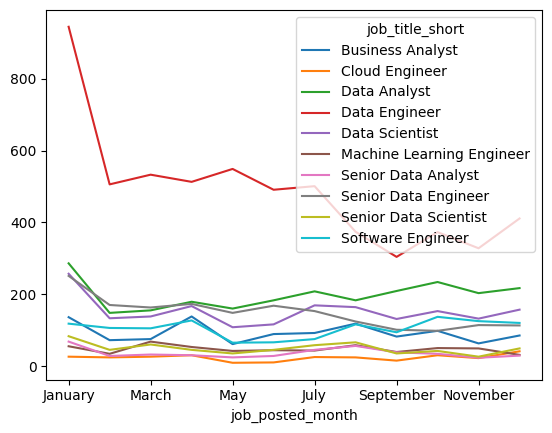

In [ ]:
# Creating a plot from sorted pivot table, though it includes all jobs which makes it tough to read
df_Canada_pivot.plot(kind='line')

In [ ]:
# Creating list of top 5 most posted job titles from original Canada dataframe
top_5 = df_Canada['job_title_short'].value_counts().head(5)
top_5 = top_5.index.to_list()

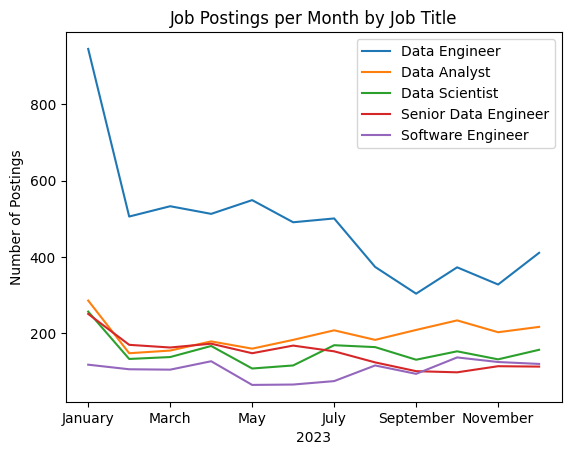

In [47]:
# Using the adjusted pivot table with only the top 5 overall posted positions to create new, more readable line chart
df_Canada_pivot[top_5].plot(kind='line')
plt.title('Job Postings per Month by Job Title')
plt.xlabel('2023')
plt.ylabel('Number of Postings')
plt.legend()
plt.show()